In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Loading and Visualising the dataset

The MNIST (Mixed [National Institute of Standards and Technology](https://en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology)) is a database of handwritten digits. It is one of the most common datasets used for image classification. It contains **60,000 training images** and **10,000 testing images** taken from American Census Bureau employees and American high school students.


Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, we start with the following lines to import MNIST dataset and check the shape of the data.


In [ ]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print('Shape of training_images dataset', training_images.shape)
print('Shape of training_labels', training_labels.shape)

print('Shape of training_images dataset', test_images.shape)
print('Shape of test_labels', test_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shape of training_images dataset (60000, 28, 28)
Shape of training_labels (60000,)
Shape of training_images dataset (10000, 28, 28)
Shape of test_labels (10000,)


60000 represents the number of images in the train dataset and (28, 28) represents the size of the image: 28 x 28 pixel.

Now let's try to visualize one of the images from this dataset and its corresponding label

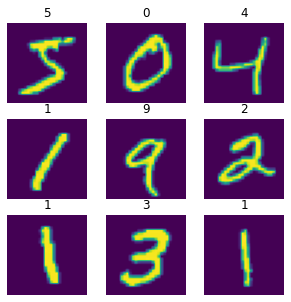

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i])
  plt.title(training_labels[i])
  plt.axis("off")
  

## Normalising the Data

The images comprise of matrices of pixel values. Color images have array of pixel values for each color channel in RGB.

Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as in the slower than expected training of the model.

Hence, we will standardize values to be in the [0, 1] by by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code).

NOTE: It's important that the training set and the testing set be preprocessed in the same way. Hence we will apply same notmalisation on the testing dataset as well.

In [ ]:
# Making sure that the values are float so that we can get decimal points after division
training_images = training_images.astype('float32')
test_images = test_images.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
training_images = training_images / 255.0
test_images = test_images / 255

print('training_images shape:', training_images.shape)
print('test_images shape:', test_images.shape)

training_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)


## Utilities

Here are some charting utilities which we will be using to plot the loss and accuracy charts

In [ ]:
# Visualize training results
# Create plots of loss and accuracy on the training and validation sets.
# https://www.tensorflow.org/tutorials/images/classification#visualize_training_results
def plotLossAndValAccuracy(history):
  acc = history.history['accuracy']
  loss = history.history['loss']
  
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  epochs_range = range(len(acc))

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)

  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


def plotMulti(histories, names):
  styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
  plt.figure(figsize=(15,5))
  
  for i in range(len(histories)):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
  
  plt.ylabel('validation accuracy')
  plt.title('validation accuracy for different model architectures')
  plt.xlabel('epoch')
  plt.legend(names, loc='upper left')
  axes = plt.gca()
  axes.set_ylim([0.90,1])
  plt.show() 

# Training a DNN

There are a number of parameters which can be tested here.
- The depth of the model. Currently I am using a 2 layer deep model
- The width of the model. This is the number of nodes in each layer. Making each layer wider increases the total number of tunable parameters.

[This post](https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3) beautifully explains the role of these parameter and how to experiment with these. [Link](https://colab.research.google.com/drive/1U0sRZdxVUn8LbQN9KidMaomKt2MPJ2-o#forceEdit=true&offline=true&sandboxMode=true&scrollTo=ViGZ1Nf6qLZ9) to accompanying colab page.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9266 - val_loss: 0.1406 - val_accuracy: 0.9579
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1139 - accuracy: 0.9665 - val_loss: 0.1079 - val_accuracy: 0.9684
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0783 - accurac

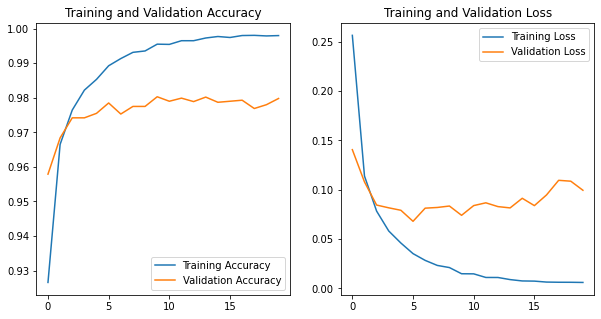

313/313 - 0s - loss: 0.0995 - accuracy: 0.9798
Accuracy of this model is 0.9797999858856201


In [ ]:
# define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train 
history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels))

# evaluate and plot graphs
plotLossAndValAccuracy(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Accuracy of this model is', test_acc)

## Testing different DNN architectures

For fully connected neural networks, there are three essential parateters that define the network’s architecture:
- **Depth** - Number of Deep layers
- **Breadth** - Number of nodes in each of these layers
- Transfer/activation function used at each of these layers

DNN (DNN)x1: Epochs=10, Train accuracy=0.99627, Validation accuracy=0.98020
DNN (DNN)x2: Epochs=10, Train accuracy=0.99535, Validation accuracy=0.97950
DNN (DNN)x3: Epochs=10, Train accuracy=0.99063, Validation accuracy=0.97490


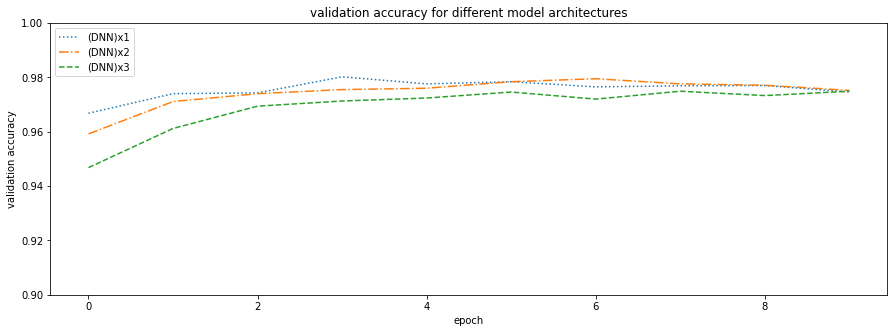

In [ ]:
layers = tf.keras.layers

widths = [264, 128, 64]
depths = [1,2,3,4]
model = [0] * len(widths)

# build models
for width in widths:
  index = widths.index(width)
  
  model[index] = tf.keras.models.Sequential()
  model[index].add(layers.Flatten(input_shape=(28, 28)))
  model[index].add(layers.Dense(width, activation='relu'))
  model[index].add(layers.Dense(10, activation='softmax'))

  model[index].compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])  

# fit and train
epochs = 10
history = [0] * len(widths)
names = ["DNN-W-256","DNN-W-128","DNN-W-64"]
for j in range(len(widths)):
  history[j] = model[j].fit(training_images, training_labels, epochs = epochs, validation_data=(test_images, test_labels), verbose=0)
  print("{0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))   
  
# plot data  
plotMulti(history, names)  

# Training a CNN

A typical CNN design begins with feature extraction and finishes with final image classification.

- Feature extraction is performed by alternating convolution layers with subsampling layers
- Classification is performed with dense layers followed by a final softmax layer

Also, to be able to use the dataset in Keras API, we need 4-dims NumPy arrays. Hence, we will also need to reshape the data before feeding to the models.

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

print('training_images shape:', training_images.shape)
print('test_images shape:', test_images.shape)

training_images shape: (60000, 28, 28, 1)
test_images shape: (10000, 28, 28, 1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1371 - accuracy: 0.9590 - val_los

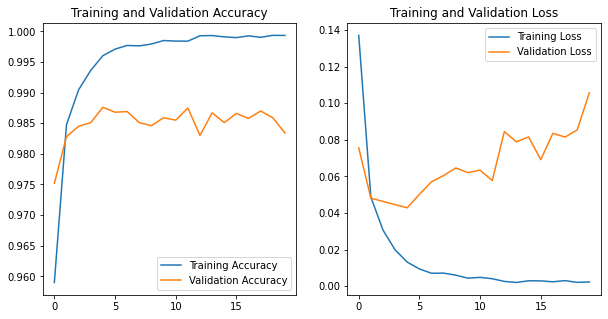

313/313 - 1s - loss: 0.1057 - accuracy: 0.9834
Accuracy of this model is 0.9833999872207642


In [ ]:
# define model
model = tf.keras.models.Sequential([                                    
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train
history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels))

# evaluate and plot graphs
plotLossAndValAccuracy(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Accuracy of this model is', test_acc)

## Adding Dropout Layer

Dropout will prevent our network from overfitting thus helping our network generalize better. How much dropout should we add after each layer?

Additionally, we can notice some overfitting by looking at the learning curve of both models. This can be countered with the addition of Dropout layers. These were purposefully not added so one can get a sense of their effect.

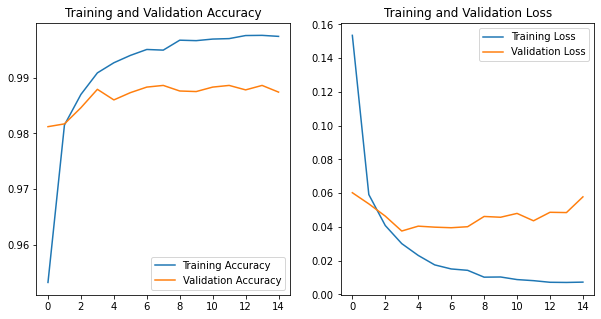

313/313 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9874


In [ ]:
model = tf.keras.models.Sequential([                                    
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=15, validation_data=(test_images, test_labels), verbose=0)

plotLossAndValAccuracy(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

Adding a dropout layer has helped improve the accuracy by some extent. 
Although the loss graph has settled down a bit but we can still see some overfitting since the graphs are not truly converging.

We will visit dropout again but first lets find the optimal CNN architecture to test the data.


## Testing different CNN Architectures

Similar to the exercise we did with DNN, we can play around with different model architectures to see what improvements we can achieve by introducing extra sub-sampling layers, filters and pooling layers.

We start with testing multiple multiple pairs of convolution-subsamplings. For example, our network could have 1, 2, or 3:

- 784 - [24C5-P2] - 256 - 10
- 784 - [24C5-P2] - [48C5-P2] - 256 - 10
- 784 - [24C5-P2] - [48C5-P2] - [64C5-P2] - 256 - 10

We are not doing four pairs since the image will be reduced too small before then. The input image is 28x28. After one pair, it's 14x14. After two, it's 7x7. After three it's 4x4 (or 3x3 if we don't use padding='same'). It doesn't make sense to do a fourth convolution.

CNN (C-P)x1: Epochs=10, Train accuracy=0.99867, Validation accuracy=0.99010
CNN (C-P)x2: Epochs=10, Train accuracy=0.99777, Validation accuracy=0.99210
CNN (C-P)x3: Epochs=10, Train accuracy=0.99717, Validation accuracy=0.99380


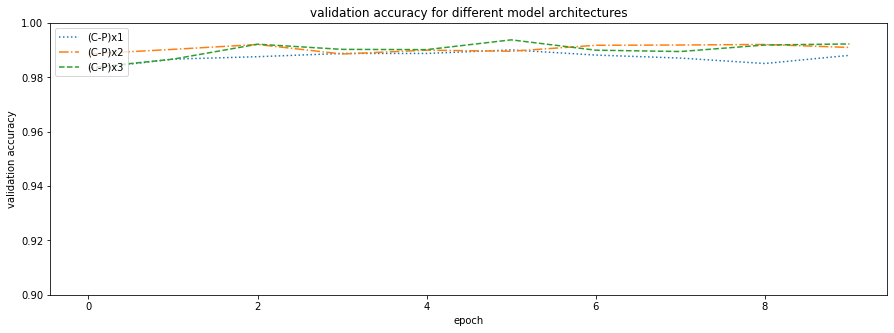

In [ ]:
# build models
layers = tf.keras.layers
nets = 3
model = [0] * nets

for j in range(3):
    model[j] = tf.keras.models.Sequential()
    model[j].add(layers.Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(layers.MaxPool2D())
    if j>0:
        model[j].add(layers.Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(layers.MaxPool2D())
    if j>1:
        model[j].add(layers.Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(layers.MaxPool2D(padding='same'))
    model[j].add(layers.Flatten())
    model[j].add(layers.Dense(256, activation='relu'))
    model[j].add(layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# fit and train
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 10
for j in range(nets):
    history[j] = model[j].fit(training_images, training_labels, epochs = epochs, validation_data=(test_images, test_labels), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))       
    
# plot data  
plotMulti(history, names)      

As we can see from the graphs above, every layer of convolutional subsampling has helped extract more features and hence improved accuracy. We are able to hit the sweet spot of **99%** accuracy!

Similar to abve setup, we can follow the similar procedure to test different combinations of feature maps, depth of layers and dropouts.

[This](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist#4.-How-much-dropout?) is an excellent which explaing all such techniques in detail.

There are still some more ways in which we can try to improve this accuracy. We can play with **tuning the hyper-parameters**, trying out **image augmentation** techniques to increase the data set and also check if we can use **transfer learning** to check how a pre-trained model fares on this handwriting recognition task. 

## Refining the winner model architecture

For now, we will pick the best combination from this and add some dropout layers to prevent some over-fitting.

Epoch 1/20
1875/1875 - 5s - loss: 0.1767 - accuracy: 0.9444 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 2/20
1875/1875 - 5s - loss: 0.0603 - accuracy: 0.9813 - val_loss: 0.0278 - val_accuracy: 0.9904
Epoch 3/20
1875/1875 - 5s - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0295 - val_accuracy: 0.9901
Epoch 4/20
1875/1875 - 5s - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0227 - val_accuracy: 0.9927
Epoch 5/20
1875/1875 - 5s - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.0236 - val_accuracy: 0.9923
Epoch 6/20
1875/1875 - 5s - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0329 - val_accuracy: 0.9912
Epoch 7/20
1875/1875 - 5s - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0228 - val_accuracy: 0.9929
Epoch 8/20
1875/1875 - 5s - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0278 - val_accuracy: 0.9917
Epoch 9/20
1875/1875 - 5s - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0259 - val_accuracy: 0.9931
Epoch 10/20
1875/1875 - 5s - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0223 - 

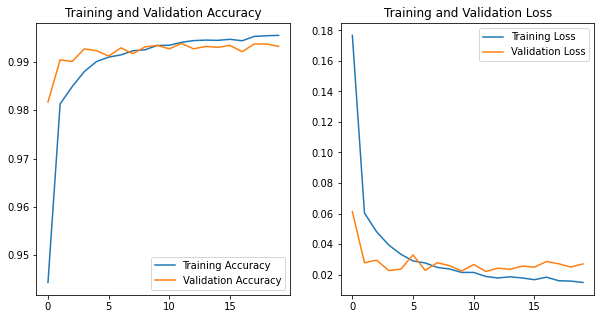

313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9932


In [ ]:
layers = tf.keras.layers

# define model
model = tf.keras.models.Sequential([                                    
  layers.Conv2D(24,kernel_size=5,padding='same',activation='relu',input_shape=(28,28,1)),
  layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  layers.Conv2D(48,kernel_size=5,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,kernel_size=5,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=2)

# summary
plotLossAndValAccuracy(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

## Saving the model


In [ ]:
model.save('model') 
!zip -r /content/model.zip /content/model

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets
  adding: content/model/ (stored 0%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 89%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model/variables/variables.index (deflated 66%)


## Prepare the model for Web Format

Till now, we have a model that is able to recognize digits with pretty good accuracy. But this model is still inside google colaboratory. To test this model with some real-world examples, we need to deploy it. One deployment strategy is to export the model to a web understandable format and provide it data via a web application.

TensorFlow provides a model convertor to convert Keras and TensorFlow models so that it can be used in a Javascript runtime. We convert the model and host the final model artefacts so that it can be downloaded in a web browser.

In [ ]:
# we install the tfjs package for conversion
!pip install tensorflowjs 
model.save('keras.h5')
!mkdir model_js
!tensorflowjs_converter --input_format keras keras.h5 model_js/
!zip -r model_js.zip model_js 

from google.colab import files
files.download('model_js.zip')

     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 112kB 8.1MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0
2020-11-17 03:28:45.921310: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
  adding: model_js/ (stored 0%)
  adding: model_js/group1-shard1of1.bin (deflated 7%)
  adding: model_js/model.json (deflated 82%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## References

- https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3
- https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb

- https://www.analyticsvidhya.com/blog/2020/03/tensorflow-serving-deploy-deep-learning-models/

- https://yanming.me/2018/07/20/checking-out-keras-with-tensorflow-in-google-colab/

- https://blog.tensorflow.org/2018/07/train-model-in-tfkeras-with-colab-and-run-in-browser-tensorflowjs.html

## Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model fitting process, creating augmented image data for you just-in-time. This reduces your memory overhead, but adds some additional time cost during model training.

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

The process is as follows
- After you have created and configured your ImageDataGenerator, you must *fit* it on your data. This will calculate any statistics required to actually perform the transforms to your image data. You can do this by calling the fit() function on the data generator and pass it your training dataset.
- The data generator itself is in fact an iterator, returning batches of image samples when requested. We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.
- Finally we can make use of the data generator. Pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train.

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
https://www.kaggle.com/moghazy/guide-to-cnns-with-data-augmentation-keras

Epoch 1/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.4265 - accuracy: 0.8615 - val_loss: 0.0630 - val_accuracy: 0.9784
Epoch 2/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1540 - accuracy: 0.9524 - val_loss: 0.0475 - val_accuracy: 0.9847
Epoch 3/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1196 - accuracy: 0.9635 - val_loss: 0.0366 - val_accuracy: 0.9877
Epoch 4/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1037 - accuracy: 0.9681 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 5/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0941 - accuracy: 0.9717 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 6/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0863 - accuracy: 0.9734 - val_loss: 0.0368 - val_accuracy: 0.9892
Epoch 7/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0829 - accuracy: 0.9750 - val_loss: 0.0332 -

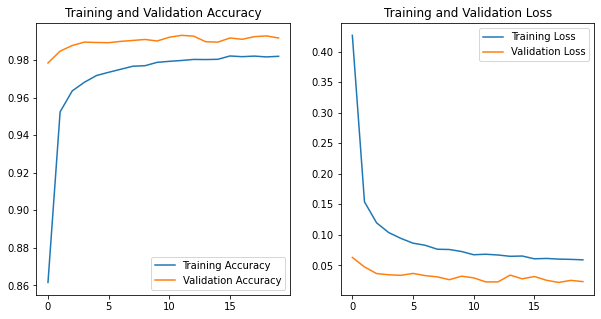

313/313 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9917


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
  rotation_range=40,
  zoom_range=0.2,
  width_shift_range=0.1, 
  height_shift_range=0.1)

# build and compile the model
model = tf.keras.models.Sequential([                                    
  layers.Conv2D(24,kernel_size=5,padding='same',activation='relu',input_shape=(28,28,1)),
  layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  layers.Conv2D(48,kernel_size=5,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,kernel_size=5,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# build the training data generator
train_generator = datagen.flow(training_images, training_labels,batch_size=40)

history = model.fit(
  train_generator,
  validation_data=(test_images, test_labels),
  epochs=20,
  verbose=1)

plotLossAndValAccuracy(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)